# Differential (gene) Expression

Identify differentially expressed genes that can discriminate between distinct classes of samples.


---
>**Edwin Juarez PhD**, UC San Diego, School of Medicine<br>
**Kate Medetgul-Ernar**, UC San Diego, Moores Cancer Center<br>
**Forrest Kim**, UC San Diego, School of Medicine<br>

<small>***Note:*** If you are unfamilar with the Jupyter Notebook or GenePattern Notebook environments, please complete the <a href="#">**GP Notebook Tutorial**</a> before continuing.</small>

<a href="#Differential-Expression-Module" class="btn btn-info" style="text-decoration: none;">Go to Module</a>

### Table of Contents

---
>1. [Introduction](#Introduction)
2. [**Differential Expression Module**](#Differential-Expression-Module)
3. [Documentation](#Documentation)
    1. [Parameters](#Parameters)
    2. [Input](#Input)
    3. [Output](#Output)
    4. [Version Information](#Version-Information)
4. [References](#References)


# Introduction

When analyzing genome-wide transcription profiles derived from RNA-seq or microarray experiments, the first step is often to identify differentially expressed genes that can discriminate between distinct classes of samples (ex. tumor vs. normal). 

Differentially expressed genes are identified by calculating, for each profiled gene, a test statistic (e.g., t-test) which asseses correlation of the gene's expression profile with a class template. If the value of the test statistic for a specific gene is significantly greater than what one would expect to see under the null hypothesis, that gene is identified as differentially expressed between classes.

The **Differential (gene) Expression modality** takes as input a dataset of expression profiles from samples belonging to two classes and, implementing the statistical tests described above, identifies differentially expressed genes which discriminate between the classes. The results are then shown in a results TXT file and a labelled heatmap, showing the most differentially expressed genes in each phenotype comparison

Why differential expression analysis? We assume that most genes are not expressed all the time, but rather are expressed in specific tissues, stages of development, or under certain conditions. Genes which are expressed in one condition, such as cancer tissue, are said to be differentially expressed when compared to normal conditions. To identify which genes change in response to specific conditions (e.g. cancer), we must filter or process the dataset to remove genes which are not informative.

This modality includes several approaches to ranking which features are most closely correlated with a class template and the significance of that correlation. These methods include the Information Coefficient (IC), Pearson correlation, Signal to noise ratio, T-test statistic, and Spearmann correlation. 


## Differential Expression Module

In [5]:
import genepattern
import cuzcatlan as cusca

from cuzcatlan import differential_gene_expression
import pandas as pd
import urllib.request
from cuzcatlan import compute_information_coefficient
from cuzcatlan import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(differential_gene_expression, name="Differential Gene Expression", 
                        description="Sort genes according to their association with a discrete phenotype or class vector.", 
                        parameters={
                            "ranking_method":{
                                "default":"custom_pearson_corr",
                                "choices":{
                                    "Information coefficient":"compute_information_coefficient",
                                    "Pearson correlation":"custom_pearson_corr",
                                    "Signal to noise_ratio":"signal_to_noise_ratio",
                                    "T test statistic":"t_test_statistic",
                                    "Spearman correlation":"spearman_correlation",
                                }
                            }
})

GPUIBuilder(description='Sort genes according to their association with a discrete phenotype or class vector.', function_import='differential_gene_expression', name='Differential Gene Expression', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'choices': []}, {'name': 'phenotype_file', 'label': 'phenotype_file', 'optional': False, 'default': '', 'description': 'CLS filename; input binary phenotype/class distinction', 'hide': False, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': False, 'default': '', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': False, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'choices': {'Information coefficient': 'compute_information_coefficient', 'Pearson correlation': 'custom_pearson_corr', 'Signal to noise_ratio': 'signal_to_noise_ratio', 'T test statistic': 't_test_statistic', 'Spearman correlation': 'spearman_correlation'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': None, 'description': 'The title of the heatmap', 'hide': False, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7f1e3764a488> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


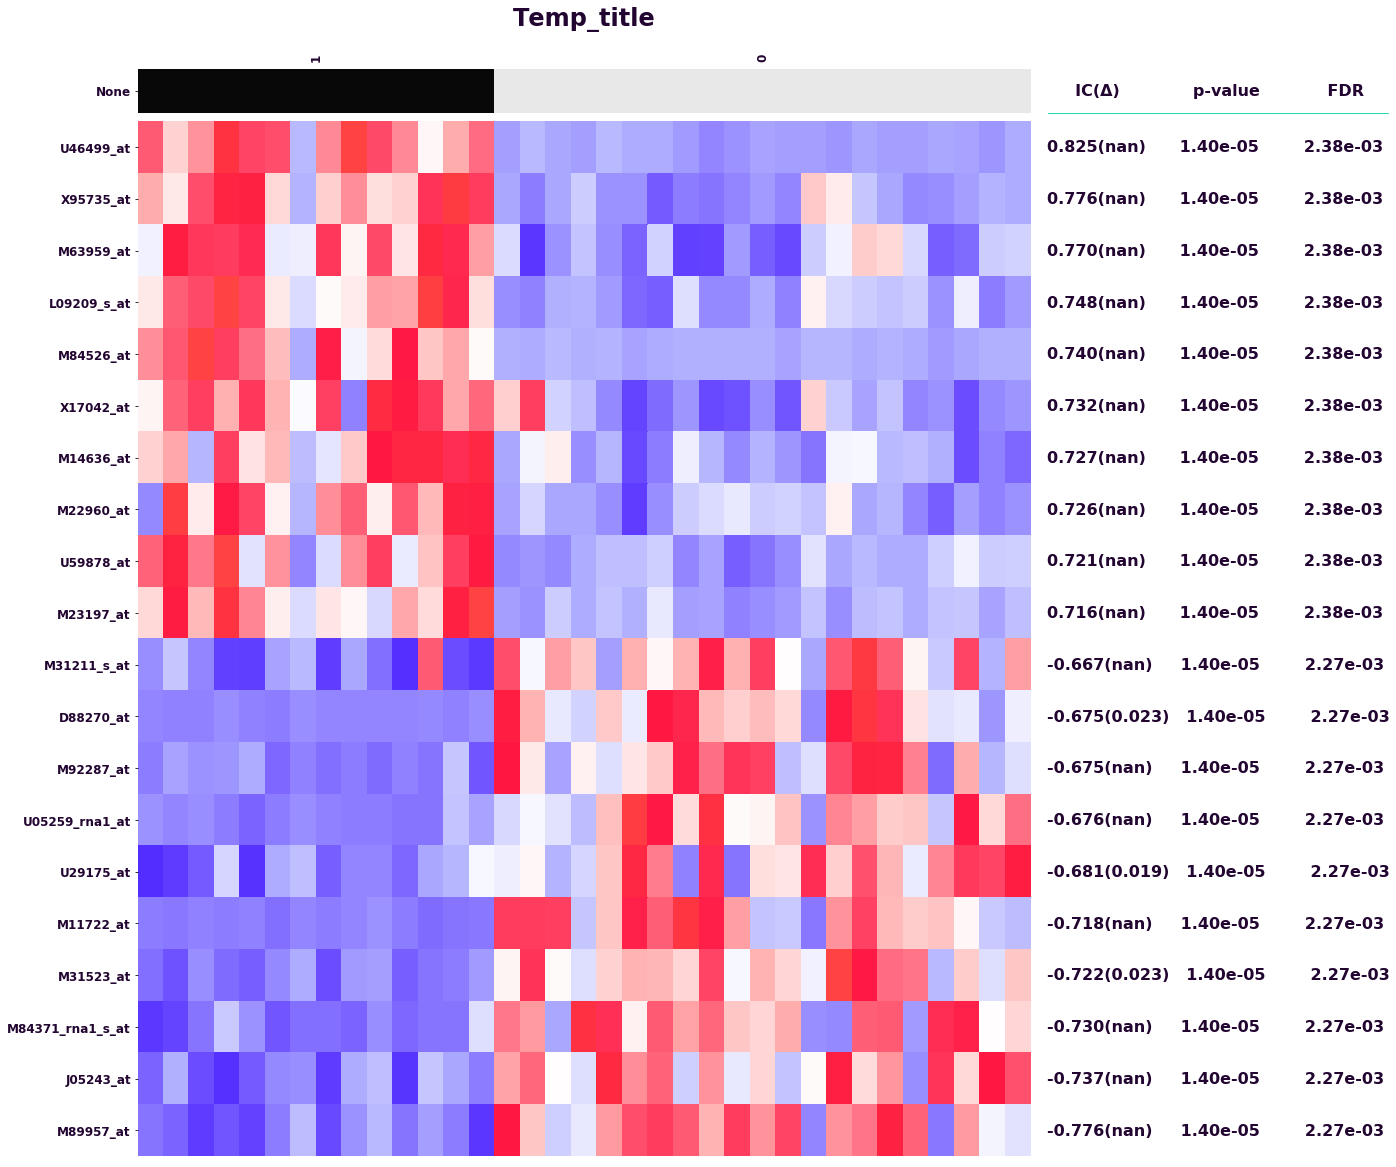

In [6]:
de_results = differential_gene_expression(gene_expression="http://datasets.genepattern.org/all_aml/all_aml_test.gct", phenotype_file="http://datasets.genepattern.org/all_aml/all_aml_test.cls", output_filename="Temp", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="Temp_title", random_seed=20121020)

# Documentation

### Parameters
>1. **input_gene_expression**
    1. Gene expression data filename (.gct or .txt file) or python DataFrame object where rows are genes and columns are samples.
        1. ex. all_aml_test.gct
2. **phenotypes_labels**
    1. Phenotype of each sample in input_gene_expression file (array, Series where indices match , or row of GCT file)
        1. ex. all_aml_test.cls
3. **n_top_hits_to_display**
    1. The number of most differentially expressed genes to show in the output plot (e.g., if this value is 5, a total of 10 genes (up/down-regulated) will be shown for each phenotype comparison).
        1. 20 (default)
4. **ranking_method** 
    1. The function used to perform the differential expression analysis. The choice of ranking_method also specifies the statistical significance calculation.
        1. information_coefficient (default)
        2. Pearson_correlation
        3. signal_to_noise_ratio
        4. t_test_statistic
        5. Spearman correlation
5. **multi_phenotype_mode** 
    1. Perform multiple differential expression runs for multiple phenotypes and produces the same outputs as a 2 phenotype run but with results stacked (with “genes_to_show” x 2 entries for each comparison). When using multiple phenotypes the outputs (heatmap or tables) have the same format but show a stack of results corresponding to each class comparison.
        1. one_vs_all (default)
        2. all_pairs

## Input
To use this module, you will need expression data (in the GCT or TXT file format) and the corresponding phenotype labels (in the CLS file format). Feel free to substitute your own data, for each of the example files.

> **Example Dataset**: The example dataset comes from "Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression Monitoring" (<a href="#">Golub *et al.* 1999</a>):<br>
>>[**all_aml_test.cls**](http://datasets.genepattern.org/all_aml/all_aml_test.cls) - Phenotype Labels for AML and ALL test dataset
<br>[**all_aml_test.gct**](http://datasets.genepattern.org/all_aml/all_aml_test.gct) - Expression Data for AML and ALL test dataset

This study used clustering and prediction algorithms to find genes that distinguish between two types of acute leukemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). Specifically, they used a class discovery and prediction method to demonstrate that cancer classification was feasible using gene expression monitoring, while being indepenendent of previous biological knowledge. The tested dataset comes from sequencing of 38 bone marrow samples from acute leukemia patients. (<a href="#">Golub *et al.* 1999</a>)


## Output
The Differential Gene Expression Module will output 

>1. **Differential_expression_heatmap**
    1. A PNG file of a heatmap showing the “n_top_hits_to_display” most differentially expressed genes in each phenotype comparison. Includes the confidence intervals for the metric and statistical significance results.
2. **Differential_expression_results**
    1. A tab-separated TXT file which contains the results of the entire differential expression analysis, the confidence intervals for the metric and statistical significance results.
3. **Returns**
    1. This function returns (python) a data frame showing the same genes as the heatmap (gene_to_show x 2 entries).

## Version Information

>Beta

## References
<small>
1. Benjamini Y, Hochberg Y. Controlling the False Discovery Rate: A Practical and Powerful Approach to Multiple Testing. Journal of the Royal Statistical Society. Series B (Methodological). 1995;57(1):289-300. 
2. Golub T, Slonim D, et al. Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression. Science. 1999;286:531-537. 
3. Good P. Permutation Tests: A Practical Guide for Testing Hypotheses, 2nd Ed. New York: Springer-Verlag. 2000. 
4. Gould J, Getz G, Monti S, Reich M, Mesirov JP. Comparative gene marker selection suite. Bioinformatics. 2006;22;1924-1925, doi:10.1093/bioinformatics/btl196. 
5. Lu J, Getz G, Miska E, et al. MicroRNA Expression Profiles Classify Human Cancers. Nature. 2005;435:834-838. 
6. Storey JD, Tibshirani R. Statistical significance for genomewide studies. PNAS. 2003;100(16):9440-9445. 
7. Westfall PH, Young SS. Resampling-Based Multiple Testing: Examples and Methods for p-Value Adjustment, in Wiley Series in Probability and Statistics. New York: Wiley, 1993.
</small>

<a href="#Differential-(gene)-Expression" class="btn btn-info" style="text-decoration:none;">To Top</a>